In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs3.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x))

C:\Users\Ian\AppData\Local\Temp\ipykernel_10416\1074689253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_job_title, palette='dark:b')


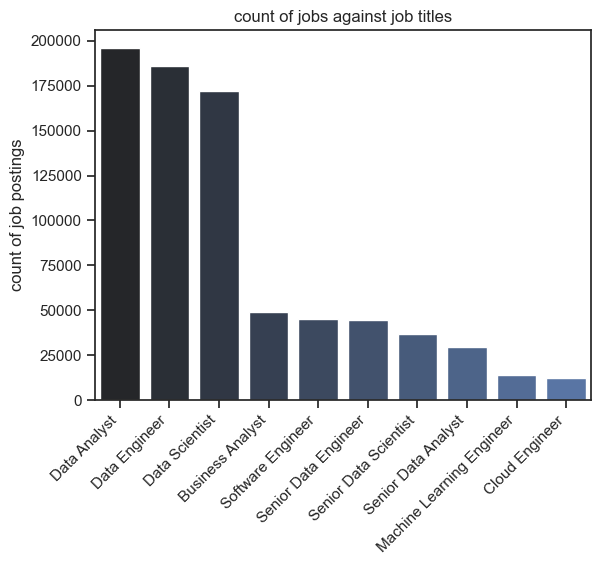

In [28]:
df_sea = df.copy()
df_job_title = df_sea['job_title_short'].value_counts().sort_values(ascending=False)
sns.barplot(df_job_title, palette='dark:b')
sns.set_theme(style='ticks')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('count of job postings')
plt.title('count of jobs against job titles')
plt.show()

histgram in seaborn

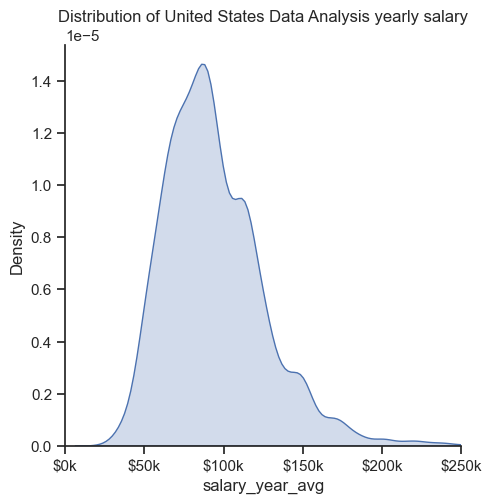

In [34]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_us_plot = df_DA_US['salary_year_avg']
sns.displot(df_us_plot, kind='kde', fill=True)
plt.title('Distribution of United States Data Analysis yearly salary')
plt.xlim(0, 250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

box graph

C:\Users\Ian\AppData\Local\Temp\ipykernel_10416\3244536684.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_job_list, labels=job_title_list, vert=False)


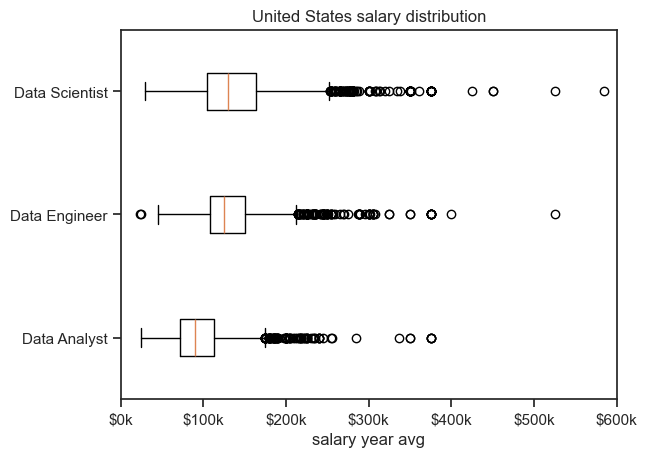

In [35]:
job_title_list = df["job_title_short"].value_counts().sort_values(ascending=False).head(3).index.tolist()
df_box_us = df[(df['job_title_short'].isin(job_title_list)) & (df['job_country']=='United States')].copy()

df_box_us.dropna(subset='salary_year_avg', inplace=True)
box_job_list = [df_box_us[df_box_us['job_title_short']==box_job_title]['salary_year_avg'] for box_job_title in job_title_list]

plt.boxplot(box_job_list, labels=job_title_list, vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlabel('salary year avg')
plt.title("United States salary distribution" )
plt.xlim(0, 600000)
plt.show()


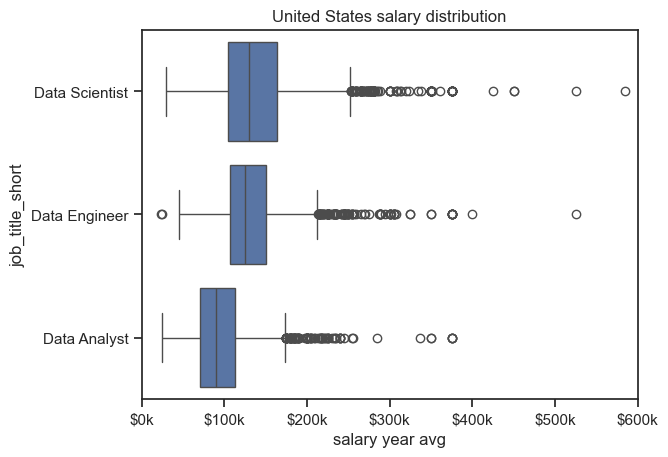

In [39]:
df_box_us.sort_values(by='salary_year_avg', ascending=False, inplace=True)
sns.boxplot(data = df_box_us, x='salary_year_avg', y='job_title_short')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlabel('salary year avg')
plt.title("United States salary distribution" )
plt.xlim(0, 600000)
plt.show()
